In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use("default")

from test import load_schedule_from_file
import numpy as np

In [17]:
def load_test_storage_performance(greedy_file_template, genetic_file_template):
    greedy_stores = []
    genetic_stores = []
    for i in range(10):
        greedy_store = load_schedule_from_file(greedy_file_template.format(index=i))
        greedy_stores.append(greedy_store)
        genetic_store = load_schedule_from_file(genetic_file_template.format(index=i))
        genetic_stores.append(genetic_store)
    greedy_makespans = [store.data['makespan'] for store in greedy_stores]
    genetic_makespans = [store.data['makespan'] for store in genetic_stores]
    greedy_runtimes = [store.data['runtime'] for store in greedy_stores]
    genetic_runtimes = [store.data['runtime'] for store in genetic_stores]
    print("greedy_runtimes:", greedy_runtimes)
    print("genetic_runtimes:", genetic_runtimes)
    fig, axes = plt.subplots(1, 2)
    xx = np.arange(1, 11)
    ax = axes[0]
    ax.plot(xx, greedy_makespans, label='Greedy', linestyle='--', color='red')
    ax.plot(xx, genetic_makespans, label='Genetic', linestyle='-', color='blue')
    ax.set_xlabel('Complexity')
    ax.set_ylabel('Makespan')
    ax.legend()
    ax = axes[1]
    ax.plot(xx, greedy_runtimes, label='Greedy', linestyle='--', color='red')
    ax.plot(xx, genetic_runtimes, label='Genetic', linestyle='-', color='blue')
    ax.set_xlabel('Complexity')
    ax.set_ylabel('Runtime (s)')
    ax.set_yscale('log')
    ax.legend()
    plt.tight_layout()
    plt.savefig('figures/compare_greedy_genetic_makespan-org.pdf')
    plt.show()

    fig, ax = plt.subplots(1, 1)
    xx = np.arange(1, 102)
    for i, store in enumerate(genetic_stores):
        ax.plot(xx, store.data['makespan_history'], label=f'complexity-{i + 1}')
    ax.set_xlabel('Generations')
    ax.set_ylabel('Makespan')
    ax.set_title("Genetic with Random Initialization")
    ax.legend(loc='upper center', ncol=2)
    plt.tight_layout()
    plt.savefig('figures/genetic_makespan_history-org.pdf')
    plt.show()

In [18]:
optimized_genetic_filename = 'data/optimized-genetic/genetic_makespan-{index}.pkl'
optimized_genetic_csv_file = 'data/optimized-genetic/genetic_makespan.csv'
greedy_filename = 'data/greedy/greedy_makespan-{index}.pkl'

unoptimized_genetic_filename = 'data/genetic_makespan-{index}.pkl'

greedy_runtimes: [8.239998714998364e-05, 0.0001895099994726479, 0.00039147899951785803, 0.0005805809632875025, 0.0011175869731232524, 0.0013390060048550367, 0.0020589749910868704, 0.0025860120076686144, 0.0031375340186059475, 0.003970157005824149]
genetic_runtimes: [1.3619101020158269, 4.869949778018054, 13.467788957001176, 27.24353290599538, 44.987352611962706, 66.36497832898749, 86.1761919829878, 114.49414094502572, 162.30573912104592, 212.16586647101212]


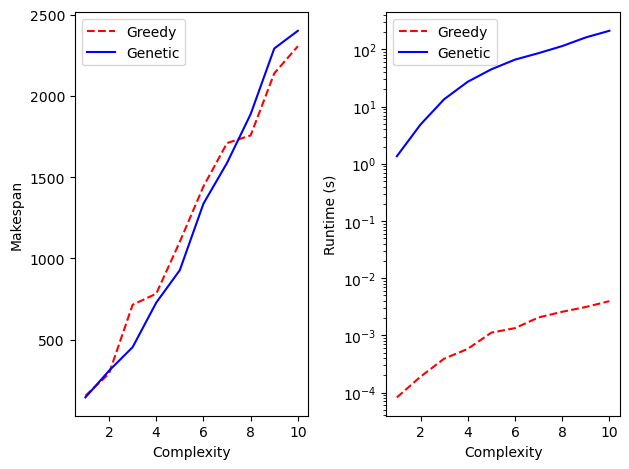

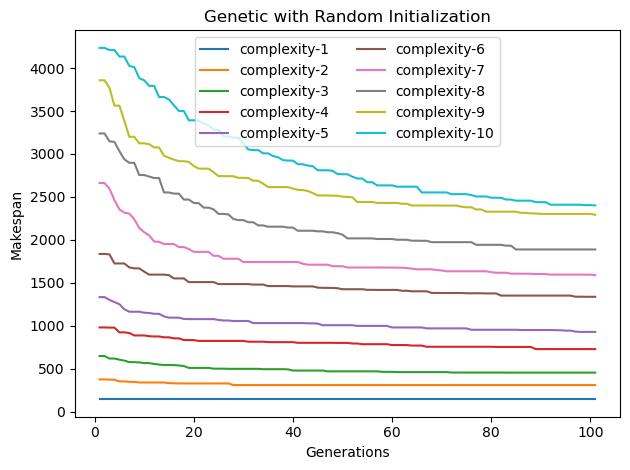

In [19]:
load_test_storage_performance(greedy_filename, unoptimized_genetic_filename)

In [11]:
def plot_optimized_unoptimized_genetic_history(optimized_genetic_file_template, unoptimized_genetic_file_template):
    op_genetic_stores = []
    unop_genetic_stores = []
    for i in range(10):
        op_genetic_store = load_schedule_from_file(optimized_genetic_file_template.format(index=i))
        op_genetic_stores.append(op_genetic_store)
        unop_genetic_store = load_schedule_from_file(unoptimized_genetic_file_template.format(index=i))
        unop_genetic_stores.append(unop_genetic_store)
    op_genetic_makespans = [store.data['makespan'] for store in op_genetic_stores]
    op_genetic_runtime = [store.data['runtime'] for store in op_genetic_stores]
    unop_genetic_makespans = [store.data['makespan'] for store in unop_genetic_stores]
    unop_genetic_runtime = [store.data['runtime'] for store in unop_genetic_stores]
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    xx = np.arange(1, 102)
    ax = axes[0]
    for i, store in enumerate(unop_genetic_stores):
        ax.plot(xx, store.data['makespan_history'], label=f'complexity-{i + 1}')
    ax.set_xlabel('Generations')
    ax.set_ylabel('Makespan')
    ax.set_title("Genetic with Random Initialization")
    ax.legend(loc='upper center', ncol=2)
    ax = axes[1]
    for i, store in enumerate(op_genetic_stores):
        ax.plot(xx, store.data['makespan_history'], label=f'complexity-{i + 1}')
    ax.set_xlabel('Generations')
    ax.set_ylabel('Makespan')
    ax.set_title("Genetic with Greedy Initialization")
    ax.legend(loc='upper center', ncol=2)

    plt.tight_layout()
    plt.savefig('figures/genetic_makespan_history-op-unop.png', dpi=300)
    plt.show()

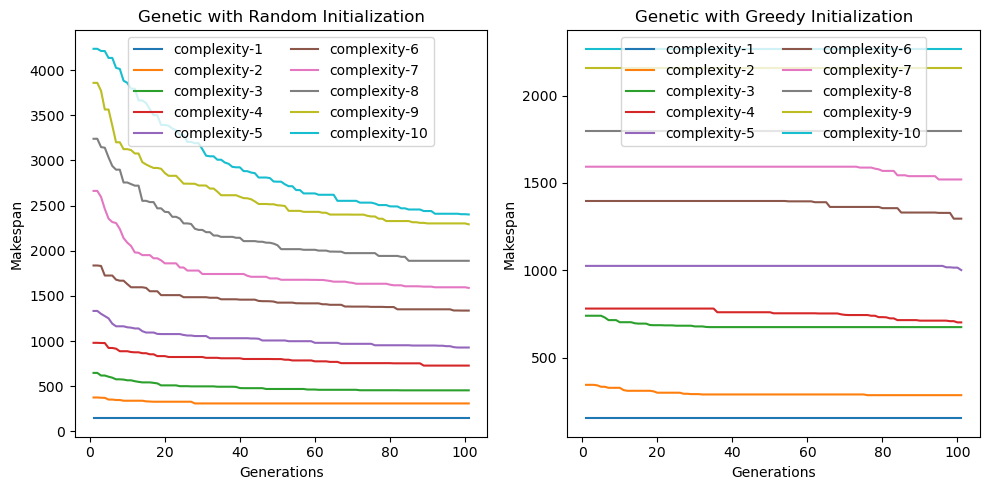

In [12]:
plot_optimized_unoptimized_genetic_history(optimized_genetic_filename, unoptimized_genetic_filename)

In [2]:
csv_file_path = 'data/greedy/greedy_sensitivity-apr19-0.csv'
df = pd.read_csv(csv_file_path)

In [3]:
df.head(10)

,index,partitions,n_machines,n_jobs,n_operations,steps_min,steps_max,algorithm,makespan,runtime
0,0,9,10,10,10,10,10,greedy_main,570,0.000274
1,1,9,10,10,10,15,15,greedy_main,1211,0.000380
2,2,9,10,10,10,20,20,greedy_main,1496,0.000497
3,3,9,10,10,10,25,25,greedy_main,1890,0.000612
4,4,9,10,10,10,30,30,greedy_main,1410,0.000725
5,5,9,10,10,10,35,35,greedy_main,2204,0.000830
6,6,9,10,10,10,40,40,greedy_main,2256,0.001345
7,7,9,10,10,10,45,45,greedy_main,2506,0.001162
8,8,9,10,10,10,50,50,greedy_main,3041,0.001282
9,9,9,10,10,10,55,55,greedy_main,3717,0.001360


In [8]:
df

,index,partitions,n_machines,n_jobs,n_operations,steps_min,steps_max,algorithm,makespan,runtime
0,0,9,10,10,10,10,10,greedy_main,570,0.000274
1,1,9,10,10,10,15,15,greedy_main,1211,0.000380
2,2,9,10,10,10,20,20,greedy_main,1496,0.000497
3,3,9,10,10,10,25,25,greedy_main,1890,0.000612
4,4,9,10,10,10,30,30,greedy_main,1410,0.000725
...,...,...,...,...,...,...,...,...,...,...
130316,130316,9,100,100,100,80,80,greedy_main,2684,0.073131
130317,130317,9,100,100,100,85,85,greedy_main,2863,0.049460
130318,130318,9,100,100,100,90,90,greedy_main,2862,0.078025
130319,130319,9,100,100,100,95,95,greedy_main,3103,0.056491


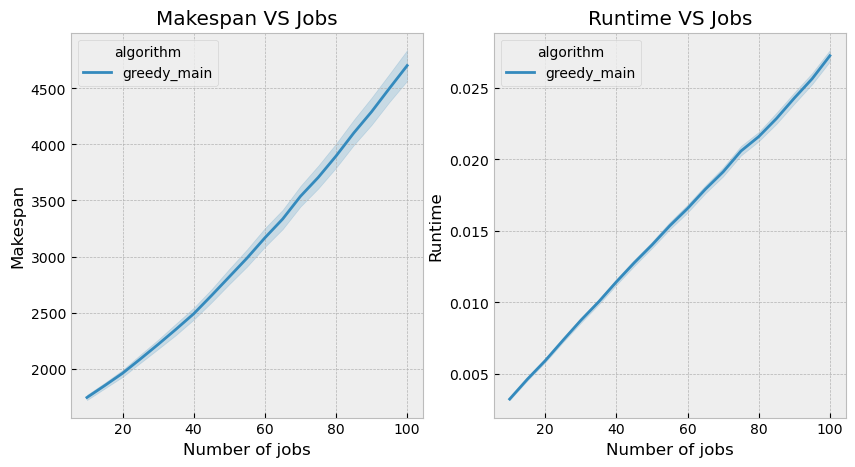

In [9]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = axes[0]
sns.lineplot(x='n_jobs', y='makespan', hue='algorithm', data=df, ax=ax)
ax.set_title('Makespan VS Jobs')
ax.set_xlabel('Number of jobs')
ax.set_ylabel('Makespan')
ax = axes[1]
sns.lineplot(x='n_jobs', y='runtime', hue='algorithm', data=df, ax=ax)
ax.set_title('Runtime VS Jobs')
ax.set_xlabel('Number of jobs')
ax.set_ylabel('Runtime')
plt.show()

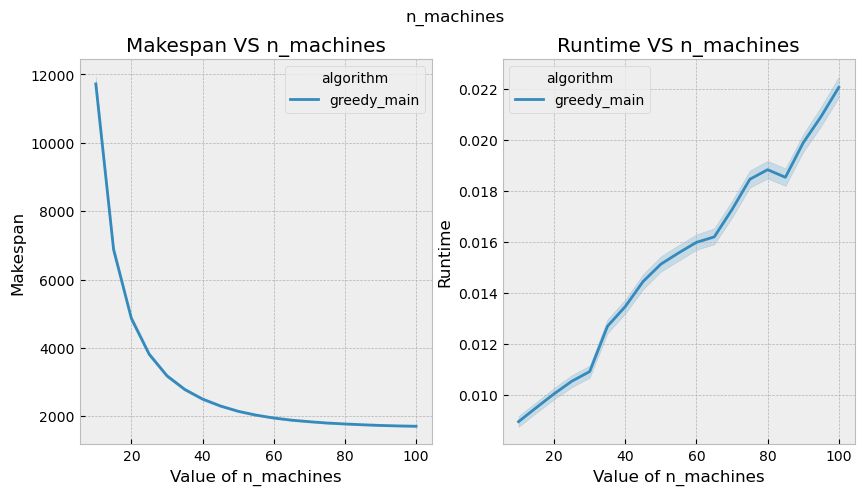

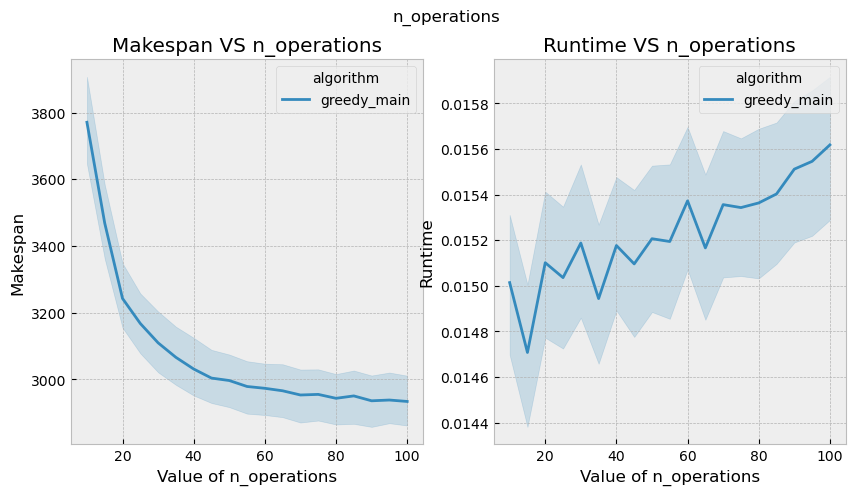

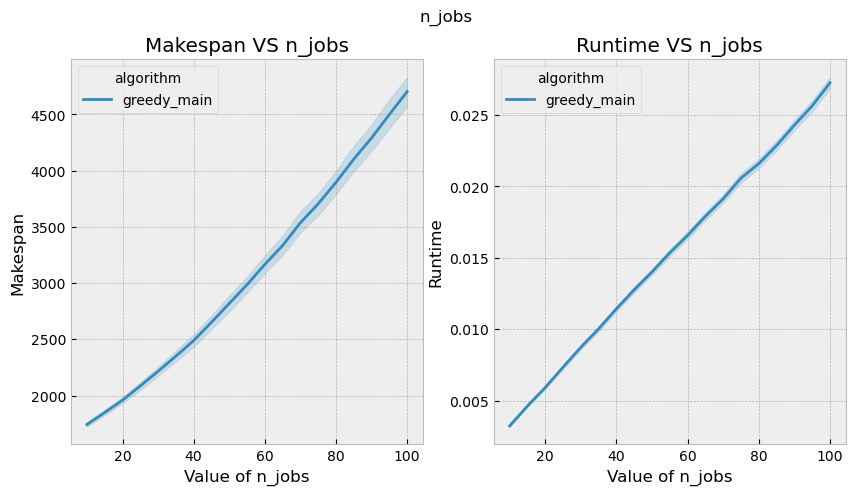

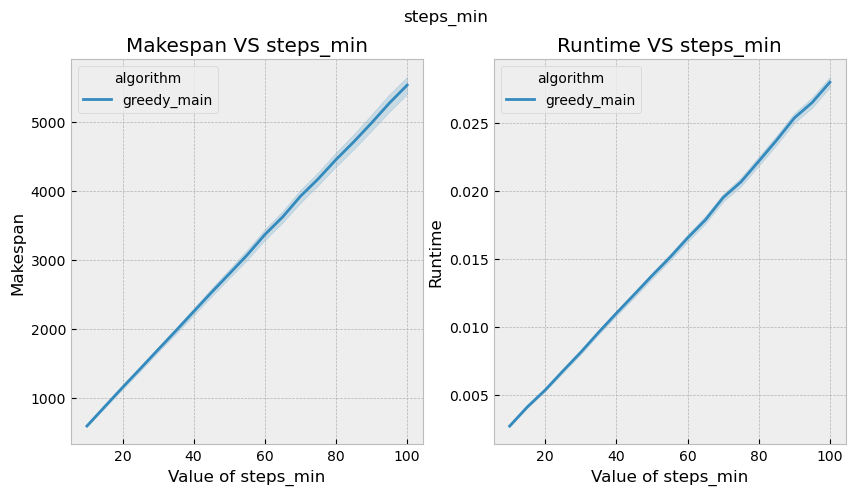

In [13]:
for x_feature in ["n_machines", "n_operations", "n_jobs", "steps_min"]:
    _, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax = axes[0]
    sns.lineplot(x=x_feature, y='makespan', hue='algorithm', data=df, ax=ax)
    ax.set_title(f'Makespan VS {x_feature}')
    ax.set_xlabel(f'Value of {x_feature}')
    ax.set_ylabel('Makespan')
    ax = axes[1]
    sns.lineplot(x=x_feature, y='runtime', hue='algorithm', data=df, ax=ax)
    ax.set_title(f'Runtime VS {x_feature}')
    ax.set_xlabel(f'Value of {x_feature}')
    ax.set_ylabel('Runtime')
    plt.suptitle(x_feature)
    plt.show()

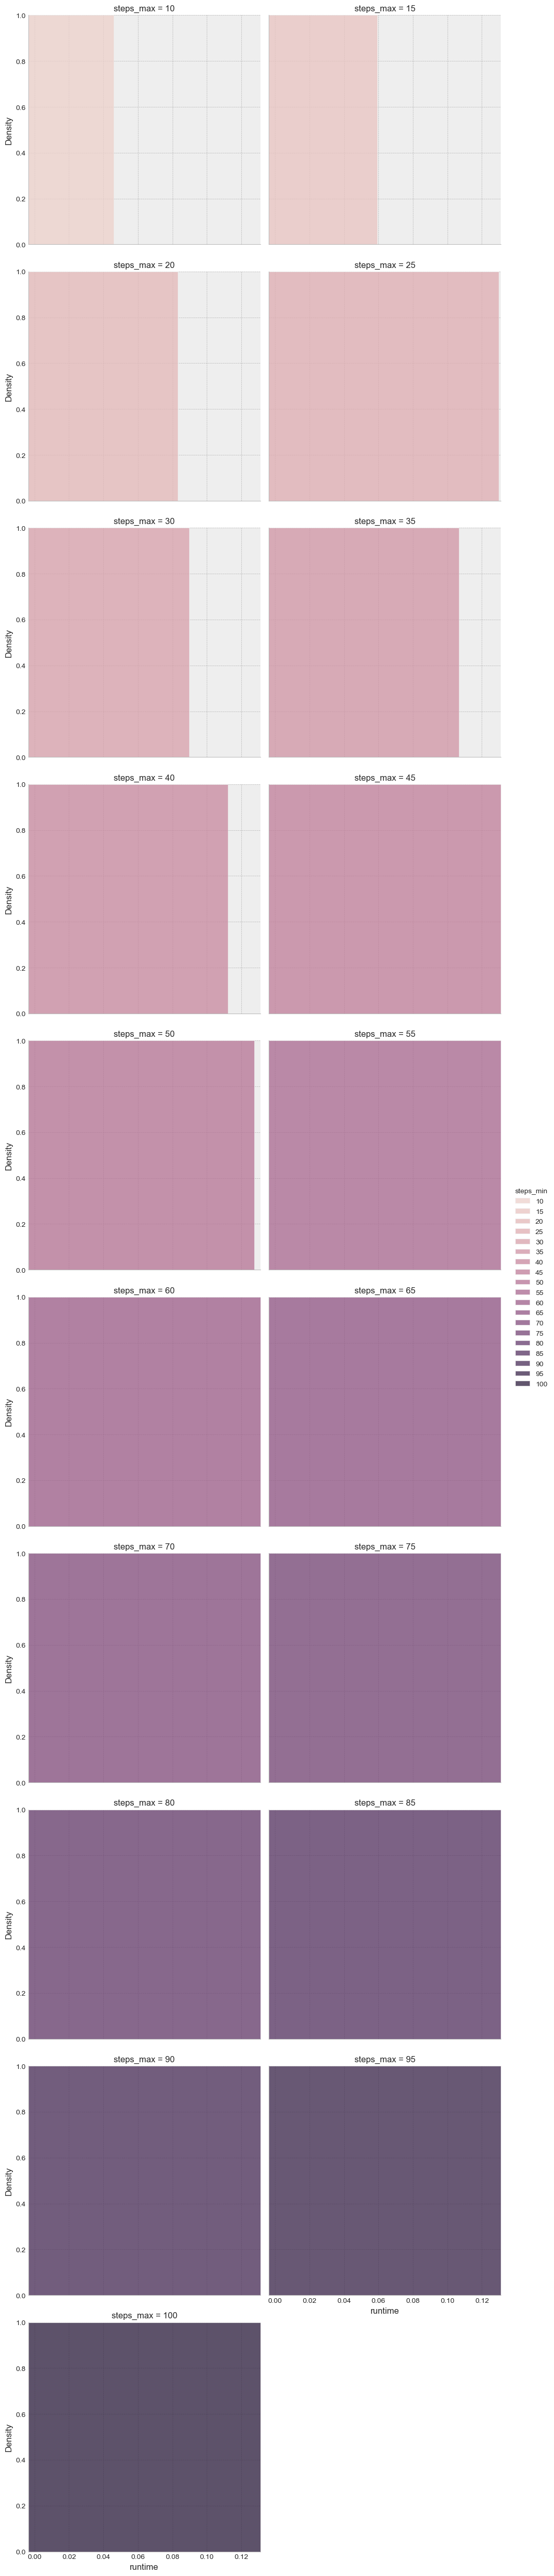

In [6]:
sns.displot(data=df, kind="kde", col="steps_max", col_wrap=2, x="runtime", hue="steps_min", multiple="fill")
plt.show()

In [7]:
df[df['runtime'] >= 0.05]

,index,partitions,n_machines,n_jobs,n_operations,steps_min,steps_max,algorithm,makespan,runtime
5923,5923,9,10,90,45,80,80,greedy_main,24578,0.054000
6134,6134,9,10,90,100,90,90,greedy_main,26514,0.058920
10297,10297,9,15,55,55,100,100,greedy_main,10312,0.052819
11302,11302,9,15,70,35,90,90,greedy_main,13870,0.054007
13051,13051,9,15,95,20,95,95,greedy_main,22377,0.109185
...,...,...,...,...,...,...,...,...,...,...
130313,130313,9,100,100,100,65,65,greedy_main,2016,0.061861
130316,130316,9,100,100,100,80,80,greedy_main,2684,0.073131
130318,130318,9,100,100,100,90,90,greedy_main,2862,0.078025
130319,130319,9,100,100,100,95,95,greedy_main,3103,0.056491


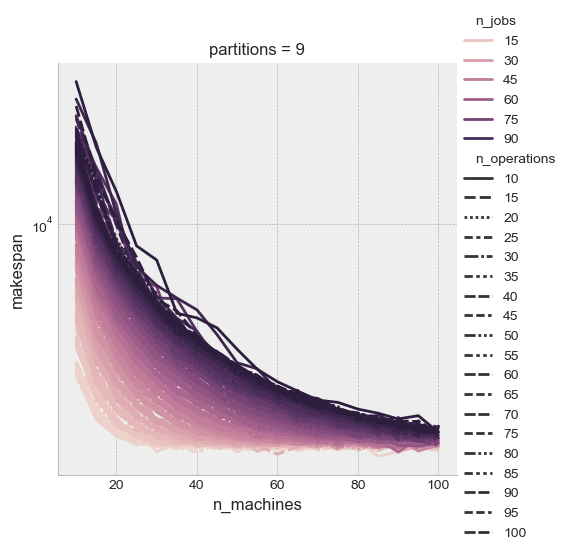

In [8]:
sns.relplot(
    data=df,
    col="partitions",
    kind="line",
    x="n_machines",
    y="makespan",
    hue="n_jobs",
    style="n_operations",
    errorbar=None,
).set(yscale="log")
plt.show()

In [9]:
df.query("n_operations == 30").head()

,index,partitions,n_machines,n_jobs,n_operations,steps_min,steps_max,algorithm,makespan,runtime
76,76,9,10,10,30,10,10,greedy_main,553,0.000273
77,77,9,10,10,30,15,15,greedy_main,852,0.000380
78,78,9,10,10,30,20,20,greedy_main,1187,0.000516
79,79,9,10,10,30,25,25,greedy_main,1363,0.000623
80,80,9,10,10,30,30,30,greedy_main,1328,0.000737


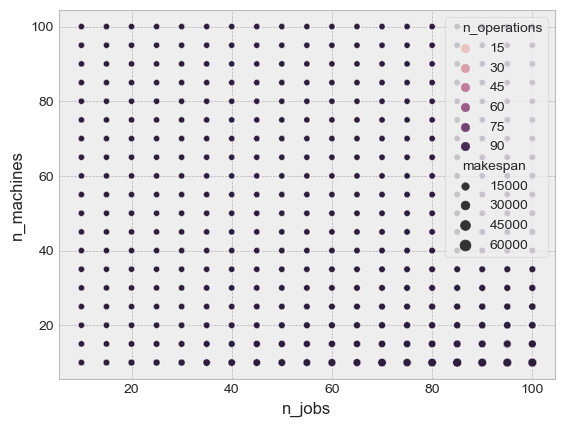

In [10]:
sns.scatterplot(
    data=df,
    size="makespan",
    x="n_jobs",
    y="n_machines",
    hue="n_operations",
)
plt.show()

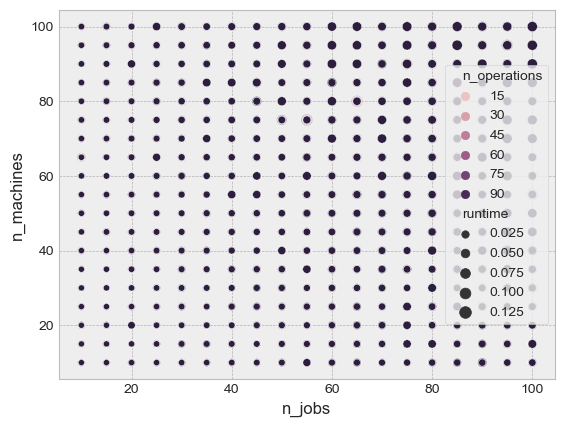

In [11]:
sns.scatterplot(
    data=df,
    size="runtime",
    x="n_jobs",
    y="n_machines",
    hue="n_operations",
)
plt.show()

In [12]:
df_n_machines = df[(df['partitions'] == 7) & (df['n_jobs'] == 60) & (df['n_operations'] == 30) & (df['steps_min'] == 5) & (df['steps_max'] == 20)]
display(df_n_machines)

,index,partitions,n_machines,n_jobs,n_operations,steps_min,steps_max,algorithm,makespan,runtime


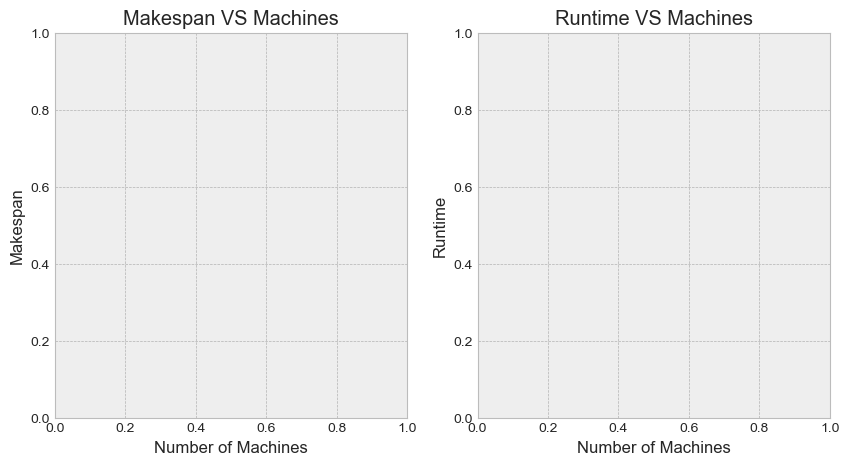

In [13]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = axes[0]
sns.lineplot(x='n_machines', y='makespan', hue='algorithm', data=df_n_machines, ax=ax)
ax.set_title('Makespan VS Machines')
ax.set_xlabel('Number of Machines')
ax.set_ylabel('Makespan')
ax = axes[1]
sns.lineplot(x='n_machines', y='runtime', hue='algorithm', data=df_n_machines, ax=ax)
ax.set_title('Runtime VS Machines')
ax.set_xlabel('Number of Machines')
ax.set_ylabel('Runtime')
plt.show()

In [14]:
df_n_steps_max = df[(df['partitions'] == 7) & (df['n_jobs'] == 60) & (df['n_machines'] == 40) & (df['n_operations'] == 30) & (df['steps_min'] == 5)]
display(df_n_steps_max)

,index,partitions,n_machines,n_jobs,n_operations,steps_min,steps_max,algorithm,makespan,runtime
